In [23]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [24]:
matches=pd.read_csv('Output.csv')
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 14 columns):
Unnamed: 0       426 non-null int64
Toss             426 non-null object
MatchID          426 non-null int64
Toss_Decision    426 non-null object
Margin           426 non-null object
Winner           426 non-null object
Date             426 non-null object
Venue            426 non-null object
TeamA            426 non-null object
TeamB            426 non-null object
HTH              426 non-null float64
WinningPerDes    426 non-null float64
Strength         426 non-null float64
Latest_Form      426 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 46.7+ KB


In [25]:
to_drop=['MatchID','Margin','Date','Venue']
matches.drop(to_drop, inplace=True, axis=1)
matches.head(5)

,Unnamed: 0,Toss,Toss_Decision,Winner,TeamA,TeamB,HTH,WinningPerDes,Strength,Latest_Form
0,0,South Africa,field,South Africa,South Africa,Sri Lanka,1.000000,0.0,16.795000,5.90326
1,1,South Africa,bat,Sri Lanka,South Africa,Sri Lanka,1.000000,0.0,4.058062,5.90326
2,2,South Africa,bat,South Africa,South Africa,Sri Lanka,0.000000,0.0,15.274242,5.90326
3,3,Sri Lanka,bat,Sri Lanka,South Africa,Sri Lanka,0.666667,1.0,3.781395,5.90326
4,4,Zimbabwe,bat,New Zealand,New Zealand,Zimbabwe,0.750000,0.0,17.873302,6.27126


In [26]:
matches.replace(['Australia','India','Sri Lanka','South Africa','England',
                 'New Zealand','Pakistan','West Indies','Bangladesh','Zimbabwe']
                ,['AUS','IND','SL','SA','ENG','NZ','PAK','WI','BAN','ZIM'],inplace=True)

encode = {'TeamA': {'AUS':1,'IND':2,'SA':3,'ENG':4,'NZ':5,'PAK':6,'SL':7,'WI':8,'BAN':9,'ZIM':10},
          'TeamB':  {'AUS':1,'IND':2,'SA':3,'ENG':4,'NZ':5,'PAK':6,'SL':7,'WI':8,'BAN':9,'ZIM':10},
          'Toss':  {'AUS':1,'IND':2,'SA':3,'ENG':4,'NZ':5,'PAK':6,'SL':7,'WI':8,'BAN':9,'ZIM':10},
          'Winner':  {'AUS':1,'IND':2,'SA':3,'ENG':4,'NZ':5,'PAK':6,'SL':7,'WI':8,'BAN':9,'ZIM':10}}
matches.replace(encode, inplace=True)
matches.head(5)

,Unnamed: 0,Toss,Toss_Decision,Winner,TeamA,TeamB,HTH,WinningPerDes,Strength,Latest_Form
0,0,3,field,3,3,7,1.000000,0.0,16.795000,5.90326
1,1,3,bat,7,3,7,1.000000,0.0,4.058062,5.90326
2,2,3,bat,3,3,7,0.000000,0.0,15.274242,5.90326
3,3,7,bat,7,3,7,0.666667,1.0,3.781395,5.90326
4,4,10,bat,5,5,10,0.750000,0.0,17.873302,6.27126


In [27]:
#we maintain a dictionary for future reference mapping teams
dicVal = encode['Winner']
print(dicVal['AUS']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
AUS


In [28]:
df = pd.DataFrame(matches)
df.describe()

,Unnamed: 0,Toss,Winner,TeamA,TeamB,HTH,WinningPerDes,Strength,Latest_Form
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,275.011737,5.192488,4.586854,4.107981,6.276995,0.471828,0.385334,2.855799,2.475315
std,161.892578,2.834334,2.677702,2.765771,2.407495,0.329128,0.319958,11.032037,5.013916
min,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,-29.494394,-25.397632
25%,132.250000,3.000000,2.000000,2.000000,4.000000,0.200000,0.000000,-4.695630,-0.055227
50%,281.000000,5.000000,4.000000,4.000000,7.000000,0.500000,0.400000,3.349741,2.597594
75%,421.750000,7.000000,7.000000,6.000000,8.000000,0.700000,0.600000,10.392614,5.294175
max,544.000000,10.000000,10.000000,9.000000,10.000000,1.000000,1.000000,34.146515,31.334423


In [29]:
#Find some stats on the match winners and toss winners
temp1=df['Toss'].value_counts(sort=True)
temp2=df['Winner'].value_counts(sort=True)
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
SL -> 55
IND -> 54
ENG -> 50
AUS -> 46
PAK -> 44
SA -> 44
ZIM -> 35
WI -> 35
BAN -> 33
NZ -> 30
No of match winners by each team
IND -> 73
SL -> 61
AUS -> 60
SA -> 48
PAK -> 45
ENG -> 41
WI -> 32
NZ -> 30
BAN -> 23
ZIM -> 13


In [30]:

temp1=df['Toss'].replace([1,2,3,4,5,6,7,8,9,10], ['Australia','India','Sri Lanka','South Africa','England','New Zealand','Pakistan','West Indies','Bangladesh','Zimbabwe'], inplace=True)
temp2=df['Winner'].replace([1,2,3,4,5,6,7,8,9,10], ['Australia','India','Sri Lanka','South Africa','England','New Zealand','Pakistan','West Indies','Bangladesh','Zimbabwe'], inplace=True)
temp1=df['Toss'].value_counts(sort=True)
temp2=df['Winner'].value_counts(sort=True)

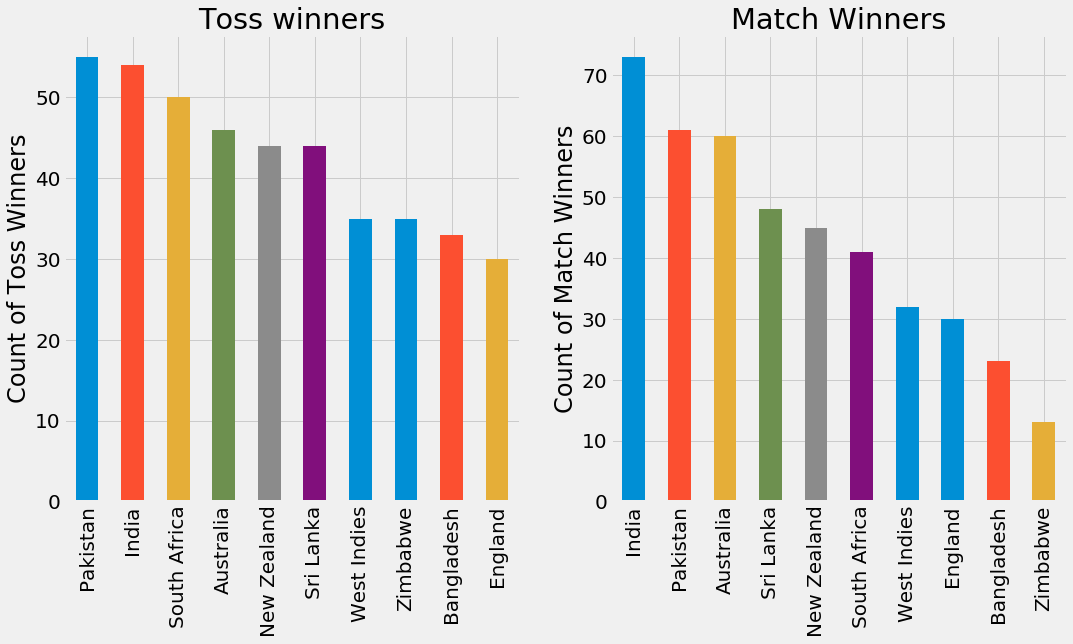

In [46]:
from PIL import Image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('Count of Toss Winners')
ax1.set_title("Toss winners")
temp1.plot(kind='bar')
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_ylabel('Count of Match Winners')
ax2.set_title("Match Winners")
plt.rcParams.update({'font.size': 20})

fig.savefig("match_winners.png",bbox_inches = 'tight')


In [32]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

Unnamed: 0       0
Toss             0
Toss_Decision    0
Winner           0
TeamA            0
TeamB            0
HTH              0
WinningPerDes    0
Strength         0
Latest_Form      0
dtype: int64

In [34]:
#building predictive model
from sklearn.preprocessing import LabelEncoder
var_mod = ['Toss','Winner','Toss_Decision']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 
df.head(3)

,Unnamed: 0,Toss,Toss_Decision,Winner,TeamA,TeamB,HTH,WinningPerDes,Strength,Latest_Form
0,0,7,1,7,3,7,1.0,0.0,16.795000,5.90326
1,1,7,0,5,3,7,1.0,0.0,4.058062,5.90326
2,2,7,0,7,3,7,0.0,0.0,15.274242,5.90326


In [40]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  
  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  kf = KFold(data.shape[0], n_folds=10)
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    
    train_target = data[outcome].iloc[train]
    
    model.fit(train_predictors, train_target)
    
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome]) 

In [41]:
from sklearn.linear_model import LogisticRegression
outcome_var=['Winner']
predictor_var = ['TeamA','TeamB','Toss','Toss_Decision','HTH','WinningPerDes','Strength','Latest_Form']
model = LogisticRegression( tol=0.0001, C=2.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=3000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1000)
classification_model(model, df,predictor_var,outcome_var)

C:\Users\cityzen10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 46.714%
Cross-Validation Score : 38.920%


In [38]:
df.head(3)

,Unnamed: 0,Toss,Toss_Decision,Winner,TeamA,TeamB,HTH,WinningPerDes,Strength,Latest_Form
0,0,7,1,7,3,7,1.0,0.0,16.795000,5.90326
1,1,7,0,5,3,7,1.0,0.0,4.058062,5.90326
2,2,7,0,7,3,7,0.0,0.0,15.274242,5.90326


In [42]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['Winner']
predictor_var = ['TeamA','TeamB','Toss','Toss_Decision','HTH','WinningPerDes','Strength','Latest_Form']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\cityzen10\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy : 100.000%


C:\Users\cityzen10\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\cityzen10\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\cityzen10\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\cityzen10\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using r

Cross-Validation Score : 54.408%


C:\Users\cityzen10\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Toss_Decision    0.031208
WinningPerDes    0.092266
HTH              0.109948
Toss             0.114897
Strength         0.151434
TeamB            0.152351
Latest_Form      0.159949
TeamA            0.187946
dtype: float64


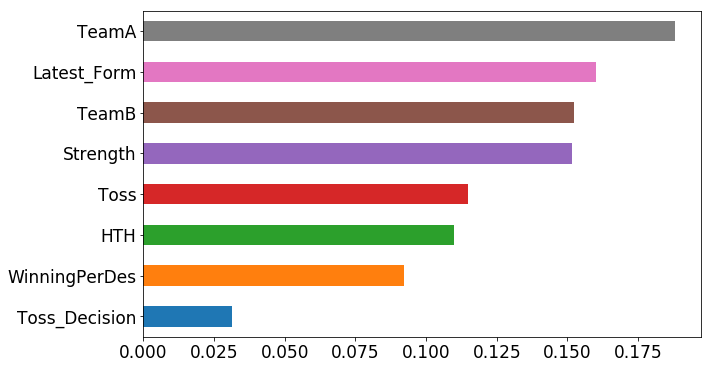

In [43]:
#feature importances: If we ignore teams, latest form seems to be one of important factors in determining winners 
from PIL import Image
import matplotlib.pyplot as plt
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=True)
fig = plt.figure(figsize=(10,6))
imp_input.plot(kind='barh')
fig.savefig('fanalysis1.png',bbox_inches = 'tight')
plt.rcParams.update({'font.size': 10})

print(imp_input)

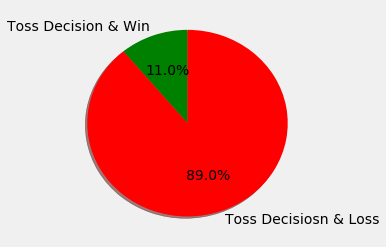

In [44]:
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#print(df.count) 
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['Toss_Decision']==df['Winner']]
slices=[len(df_fil),(426-len(df_fil))]
mlt.pie(slices,labels=['Toss Decision & Win','Toss Decisiosn & Loss'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','r'])
fig = mlt.gcf()
fig.set_size_inches(4,4)
mlt.show()
plt.rcParams.update({'font.size': 90})

fig.savefig("toss_decision.png",bbox_inches = 'tight')
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 